In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix

In [9]:
instagram_df_train=pd.read_csv('./insta_train.csv')
instagram_df_train

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.00,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.00,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.00,0,0,0,1,13,159,98,0
3,1,0.00,1,0.00,0,82,0,0,679,414,651,0
4,1,0.00,2,0.00,0,0,0,1,6,151,126,0
...,...,...,...,...,...,...,...,...,...,...,...,...
571,1,0.55,1,0.44,0,0,0,0,33,166,596,1
572,1,0.38,1,0.33,0,21,0,0,44,66,75,1
573,1,0.57,2,0.00,0,0,0,0,4,96,339,1
574,1,0.57,1,0.00,0,11,0,0,0,57,73,1


In [10]:
instagram_df_test=pd.read_csv('./insta_test.csv')
instagram_df_test

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.33,1,0.33,1,30,0,1,35,488,604,0
1,1,0.00,5,0.00,0,64,0,1,3,35,6,0
2,1,0.00,2,0.00,0,82,0,1,319,328,668,0
3,1,0.00,1,0.00,0,143,0,1,273,14890,7369,0
4,1,0.50,1,0.00,0,76,0,1,6,225,356,0
...,...,...,...,...,...,...,...,...,...,...,...,...
115,1,0.29,1,0.00,0,0,0,0,13,114,811,1
116,1,0.40,1,0.00,0,0,0,0,4,150,164,1
117,1,0.00,2,0.00,0,0,0,0,3,833,3572,1
118,0,0.17,1,0.00,0,0,0,0,1,219,1695,1


In [11]:
instagram_df_train.head()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.0,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.0,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.0,0,0,0,1,13,159,98,0
3,1,0.00,1,0.0,0,82,0,0,679,414,651,0
4,1,0.00,2,0.0,0,0,0,1,6,151,126,0


In [12]:
instagram_df_test.head()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.33,1,0.33,1,30,0,1,35,488,604,0
1,1,0.00,5,0.00,0,64,0,1,3,35,6,0
2,1,0.00,2,0.00,0,82,0,1,319,328,668,0
3,1,0.00,1,0.00,0,143,0,1,273,14890,7369,0
4,1,0.50,1,0.00,0,76,0,1,6,225,356,0


In [13]:
instagram_df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           576 non-null    int64  
 1   nums/length username  576 non-null    float64
 2   fullname words        576 non-null    int64  
 3   nums/length fullname  576 non-null    float64
 4   name==username        576 non-null    int64  
 5   description length    576 non-null    int64  
 6   external URL          576 non-null    int64  
 7   private               576 non-null    int64  
 8   #posts                576 non-null    int64  
 9   #followers            576 non-null    int64  
 10  #follows              576 non-null    int64  
 11  fake                  576 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 54.1 KB


In [14]:
instagram_df_train.describe()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,5.760000e+02,576.000000,576.000000
mean,0.701389,0.163837,1.460069,0.036094,0.034722,22.623264,0.116319,0.381944,107.489583,8.530724e+04,508.381944,0.500000
std,0.458047,0.214096,1.052601,0.125121,0.183234,37.702987,0.320886,0.486285,402.034431,9.101485e+05,917.981239,0.500435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.900000e+01,57.500000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.505000e+02,229.500000,0.500000
75%,1.000000,0.310000,2.000000,0.000000,0.000000,34.000000,0.000000,1.000000,81.500000,7.160000e+02,589.500000,1.000000
max,1.000000,0.920000,12.000000,1.000000,1.000000,150.000000,1.000000,1.000000,7389.000000,1.533854e+07,7500.000000,1.000000


In [15]:
x = pd.read_csv('insta_train.csv')
x['not_fake'] = 1 - x['fake']
y = pd.DataFrame(columns=['fake', 'not_fake'])
y['fake'] = x['fake']
y['not_fake'] = x['not_fake']
x = x.drop('fake', axis = 'columns')
x = x.drop('not_fake', axis = 'columns')

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [17]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(460, 11) (116, 11) (460, 2) (116, 2)


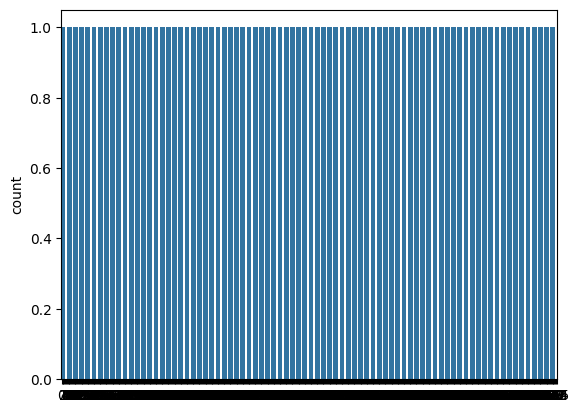

In [19]:
# sns.countplot(instagram_df_train['fake'])
# plt.show()

sns.countplot(instagram_df_train['private'])
plt.show()

# sns.countplot(instagram_df_train['profile pic'])
# plt.show()

# plt.figure(figsize = (20, 10))
# sns.distplot(instagram_df_train['nums/length username'])
# plt.show()

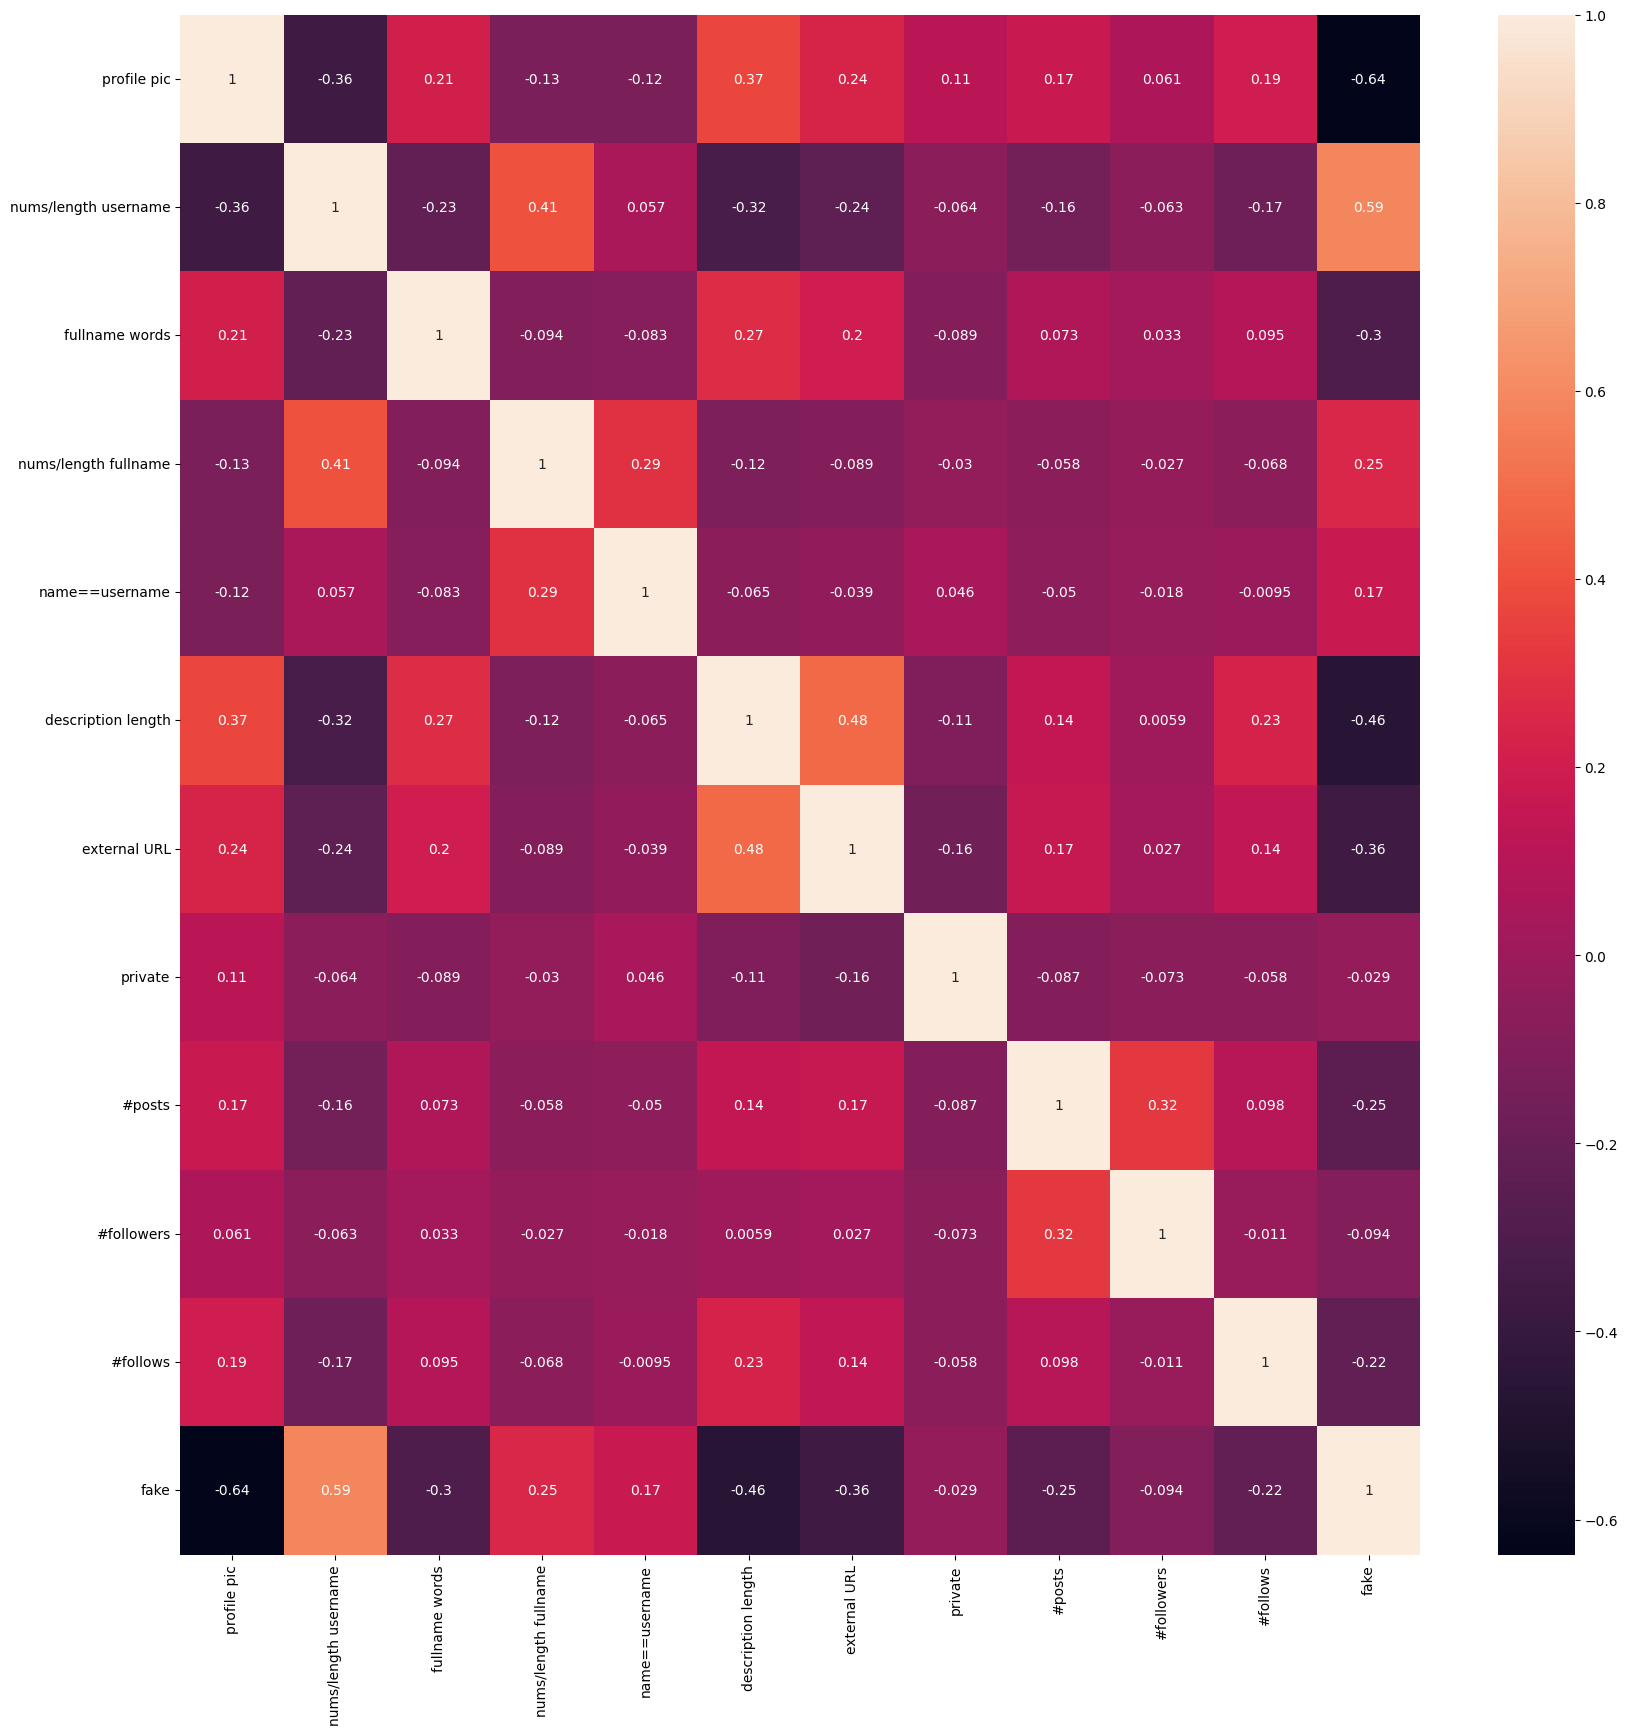

In [20]:
plt.figure(figsize=(20, 20))
cm = instagram_df_train.corr()
ax = plt.subplot()

sns.heatmap(cm, annot = True, ax = ax)
plt.show()

In [21]:
X_train = instagram_df_train.drop(columns = ['fake'])
X_test = instagram_df_test.drop(columns = ['fake'])
# X_train
# X_test

Y_train = instagram_df_train['fake']
Y_test = instagram_df_test['fake']
# Y_train
# Y_test

In [22]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler_x = StandardScaler()
X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.transform(X_test)
print(Y_train.shape)
Y_train = tf.keras.utils.to_categorical(Y_train, num_classes = 2)
print(Y_train.shape)
Y_test = tf.keras.utils.to_categorical(Y_test, num_classes = 2)

Y_train
# Y_test

(576,)
(576, 2)


array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [23]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((576, 11), (120, 11), (576, 2), (120, 2))

In [24]:
# Training_data = len(X_train)/( len(X_test) + len(X_train) ) * 100
# Training_data

Testing_data = len(X_test)/( len(X_test) + len(X_train) ) * 100
Testing_data

17.24137931034483

In [31]:
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Dense(50, input_dim=11, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(150, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(25, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(2,activation='softmax'))

# model.summary()
#X_train, X_test, y_train, y_test
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
print(X_train.shape, Y_train.shape)
model.fit(X_train, Y_train, epochs = 50,  verbose = 1, validation_split = 0.1)

(576, 11) (576, 2)
Epoch 1/50


17/17 [==============================] - 1s 13ms/step - loss: 0.6265 - accuracy: 0.6371 - val_loss: 0.3536 - val_accuracy: 0.8448
Epoch 2/50
17/17 [==============================] - 0s 3ms/step - loss: 0.4007 - accuracy: 0.8726 - val_loss: 0.2603 - val_accuracy: 0.8621
Epoch 3/50
17/17 [==============================] - 0s 3ms/step - loss: 0.2813 - accuracy: 0.9035 - val_loss: 0.2328 - val_accuracy: 0.8793
Epoch 4/50
17/17 [==============================] - 0s 4ms/step - loss: 0.2852 - accuracy: 0.9015 - val_loss: 0.1787 - val_accuracy: 0.8966
Epoch 5/50
17/17 [==============================] - 0s 4ms/step - loss: 0.2515 - accuracy: 0.9324 - val_loss: 0.1680 - val_accuracy: 0.8966
Epoch 6/50
17/17 [==============================] - 0s 3ms/step - loss: 0.2439 - accuracy: 0.9151 - val_loss: 0.1764 - val_accuracy: 0.8966
Epoch 7/50
17/17 [==============================] - 0s 3ms/step - loss: 0.2243 - accuracy: 0.9266 - val_loss: 0.2000 - val_accuracy: 0.896

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 50)                600       
                                                                 
 dense_6 (Dense)             (None, 150)               7650      
                                                                 
 dropout_3 (Dropout)         (None, 150)               0         
                                                                 
 dense_7 (Dense)             (None, 150)               22650     
                                                                 
 dropout_4 (Dropout)         (None, 150)               0         
                                                                 
 dense_8 (Dense)             (None, 25)                3775      
                                                                 
 dropout_5 (Dropout)         (None, 25)               